# C3.AI Covid Challenge
## _Data Science Project 
### Author: 

##### Team BUK
    - Vrisha Parekh (https://www.linkedin.com/in/vrisha-parekh-72a630131/)
    - Sreetam Dev (https://www.linkedin.com/in/sreetam-dev-b76530143/)

### Associated tasks
=========================================

Analyse and generate insights from the data file generated from geolocation.ipynb file.

### Table of Contents


- **1.  Loading libraries**

- **2.  Exploring the data**
    - *2.1  Setting DateTimeIndex*
   
- **3.  Exploring data analysis**

- **4. Defining Metrics**
    - 4.1. caseFatalityRate
    - 4.2. crudeMortalityRate
    - 4.3. positiveTestRate
    - 4.4. infectionFatalityRate
    - 4.5. Incidence proportion risk
    - 4.6. Point prevelance.


### 1. Loading Libraries

In [35]:
#Importing Libraries
import requests
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import gamma
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [36]:
#Importing the C3.AI datalake
import c3aidatalake


### 2. Exploring the data

In [37]:
#Reading covid-19 data hub file
dataHubCases= pd.read_csv('StateLatLongCases.csv')

#### 2.1 Setting DateTimeIndex

In [38]:
#Setting to index to dateTimeIndex.
dataHubCases= dataHubCases.set_index('date')

In [39]:
#Renaming the column
dataHubCases.rename({'confirmed':'confirmedCases'},inplace=True,axis=1)


In [40]:
#Shape of data.
print('Shape of the data is',dataHubCases.shape)

Shape of the data is (2018, 12)


In [41]:
#Finding duplicate records
print('Number of Duplicate records=',dataHubCases.duplicated().sum())

Number of Duplicate records= 0


#### 3. Exploratory Data Analysis

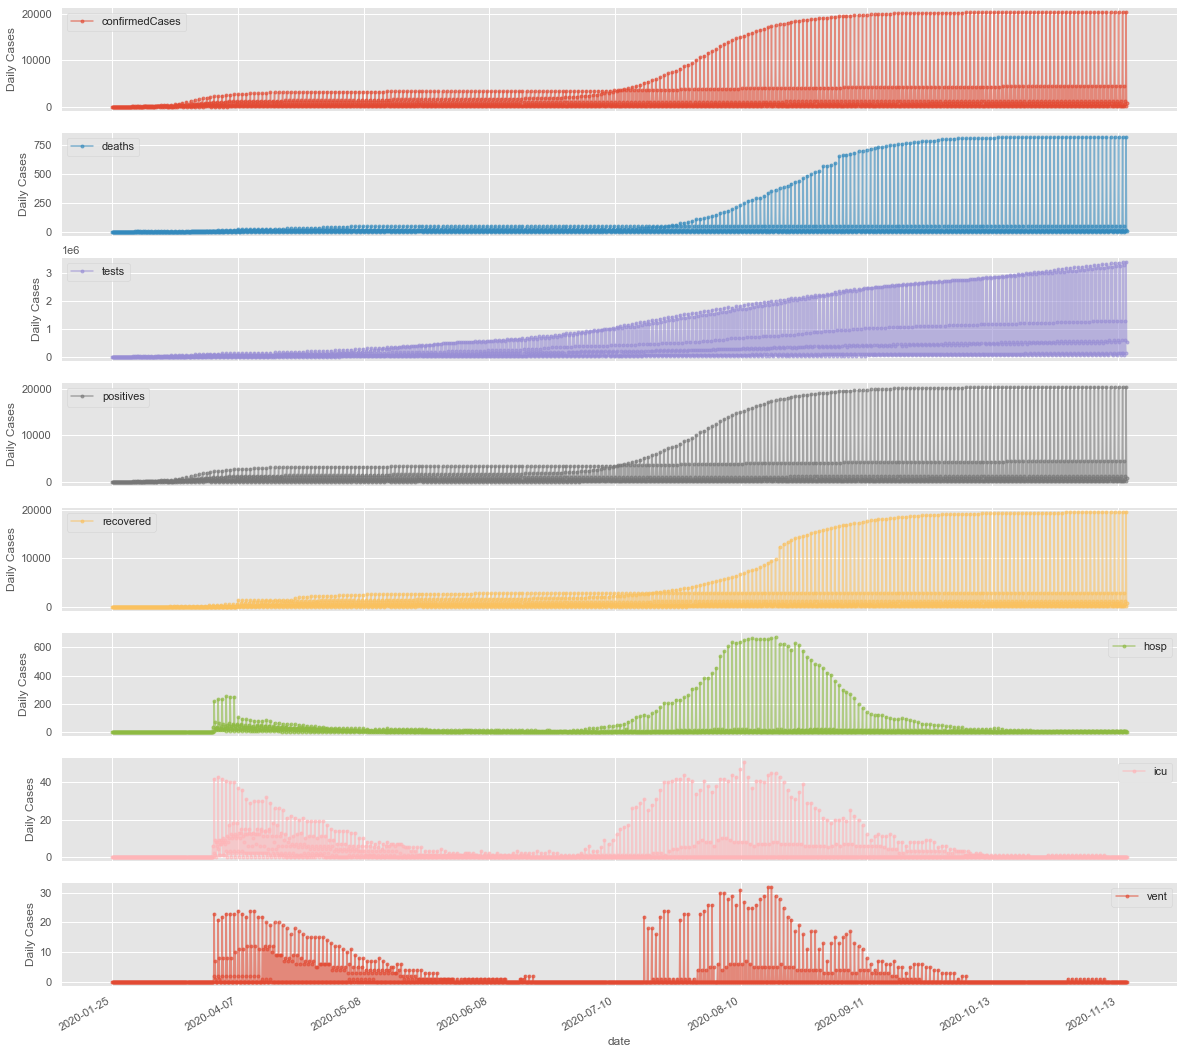

In [42]:
cols_list=['confirmedCases','deaths','tests','positives','recovered','hosp','icu','vent']

axes= dataHubCases[cols_list].plot(marker='.',alpha=0.6,figsize=(20, 20),subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Cases')
plt.show()

#### 4. Defining metrics

**4.1. caseFatalityRate- This metric is associated with the risk of death from COVID-19. It is the ratio of the total number of deaths and the total number of confirmedCases of COVID-19.**

In [43]:
#caseFatalityRate
dataHubCases['cfr']= (dataHubCases['deaths']/dataHubCases['confirmedCases'])*100

**4.2.crudeMortalityRate- This metric is linked with the question of the probability of death for an infected person. It is the ratio of the total number of deaths and the total population.**

In [44]:

#crudeMortalityRate
dataHubCases['cmr']=(dataHubCases['deaths']/dataHubCases['population'])*100


**4.3.positiveTestRate- This is the ratio of the total no of positive cases to the total number of tests conducted.**

In [45]:
#positveTestRate
dataHubCases['positiveRateTest']=(dataHubCases['positives']/dataHubCases['tests'])*100

In [46]:
#Adding a column of total cases in Australia.
dataHubCases.insert(0, 'TotalCase', 27756)

**4.4. infectionFatalityRate- This metric is more useful in determining the fatality rate of death from COVID-19.It is the ratio of the total number of deaths to the total number of cases.**

In [47]:
#IFR

dataHubCases['InfectionFatalityRate']=(dataHubCases['deaths']/dataHubCases['TotalCase'])*100
dataHubCases.head()

,TotalCase,confirmedCases,deaths,tests,positives,recovered,hosp,icu,vent,population,state_abbrev,lat,long,cfr,cmr,positiveRateTest,InfectionFatalityRate
date,,,,,,,,,,,,,,,,,
2020-01-25,27756,0,0,0,0,0,0,0,0,428060,ACT,-35.49,149.00,NaN,0.0,NaN,0.0
2020-01-25,27756,3,0,0,0,0,0,0,0,8117976,NSW,-19.42,133.37,0.0,0.0,NaN,0.0
2020-01-25,27756,0,0,0,0,0,0,0,0,245562,NT,-19.42,133.37,NaN,0.0,NaN,0.0
2020-01-25,27756,0,0,0,0,0,0,0,0,5115451,QLD,-22.57,144.55,NaN,0.0,NaN,0.0
2020-01-25,27756,0,0,0,0,0,0,0,0,1756494,SA,-30.11,135.83,NaN,0.0,NaN,0.0


**4.5.Incidence proportion risk- Ratio of number of new cases of disease during specified time interval to the population at that interval.**

In [48]:
#Incidence proportion (risk)
dataHubCases['incidenceProportionRisk']=(dataHubCases['confirmedCases']/dataHubCases['population'])*100

**4.6.Point Prevelance- Ratio of number of current cases (new and preexisting) at a specified point in time to the population at that time**

In [49]:
#Point Prevelance
dataHubCases['pointPrevelance']=((dataHubCases['confirmedCases']+dataHubCases['positives'])/dataHubCases['population'])*100


In [50]:
dataHubCases.drop(['TotalCase'],inplace=True,axis=1)

In [51]:
# Uncomment the line below to export the DataFrame as a .csv file
dataHubCases.to_csv("GeostateCasesMetric.csv")